In [1]:
from prophet import Prophet
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
import numpy as np
from prophet.plot import plot_yearly


In [2]:
data_cleaned=pd.read_csv("dati_con_fest.csv", index_col=0, parse_dates=True, squeeze=True)
data_cleaned["Date"]= pd.to_datetime(data_cleaned["Date"])

In [3]:
series1=pd.DataFrame({'x_values': data_cleaned["Date"], 'data': data_cleaned["Vendite_1"], 'holidays':data_cleaned["Holidays"]})
series1

,x_values,data,holidays
1,2017-01-01,7627.12,Capodanno
2,2017-01-02,6987.16,0
3,2017-01-03,6480.88,0
4,2017-01-04,6601.46,0
5,2017-01-05,8447.41,0
...,...,...,...
1559,2021-04-08,3779.84,0
1560,2021-04-09,4368.67,0
1561,2021-04-10,4772.16,0
1562,2021-04-11,3413.91,0


In [4]:
series1 = series1.rename(columns = {'x_values': 'ds', 'data': 'y'}, inplace = False)
series1

,ds,y,holidays
1,2017-01-01,7627.12,Capodanno
2,2017-01-02,6987.16,0
3,2017-01-03,6480.88,0
4,2017-01-04,6601.46,0
5,2017-01-05,8447.41,0
...,...,...,...
1559,2021-04-08,3779.84,0
1560,2021-04-09,4368.67,0
1561,2021-04-10,4772.16,0
1562,2021-04-11,3413.91,0


In [7]:
#creo dataset holidays
holidays=series1[['ds','holidays']]
holidays=holidays.replace("0", np.nan).dropna()
#holidays = holidays[holidays.holidays != "0"]
holidays=holidays.rename(columns={"holidays":"holiday"})
holidays

,ds,holiday
1,2017-01-01,Capodanno
6,2017-01-06,Epifania del Signore
106,2017-04-16,Pasqua di Resurrezione
107,2017-04-17,Lunedì dell'Angelo
115,2017-04-25,Festa della Liberazione
121,2017-05-01,Festa dei Lavoratori
153,2017-06-02,Festa della Repubblica
227,2017-08-15,Assunzione della Vergine
305,2017-11-01,Tutti i Santi
342,2017-12-08,Immacolata Concezione


We fit the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into the constructor. Then you call its fit method and pass in the historical dataframe. Fitting should take 1-5 seconds.

In [8]:
m = Prophet(daily_seasonality=True, holidays=holidays)
m.add_country_holidays(country_name='IT')
m.fit(series1)

Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe. By default it will also include the dates from the history, so we will see the model fit as well.

In [9]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1923,2022-04-08
1924,2022-04-09
1925,2022-04-10
1926,2022-04-11
1927,2022-04-12


The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [10]:
forecast = m.predict(future)
forecast[['ds', 'yhat','yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1923,2022-04-08,3359.456490,1162.260530,5695.815269
1924,2022-04-09,6346.929542,4091.886740,8408.580915
1925,2022-04-10,5097.744791,2880.452940,7228.621322
1926,2022-04-11,1692.930179,-726.446236,3965.995263
1927,2022-04-12,1727.556260,-556.250953,3988.969111


C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


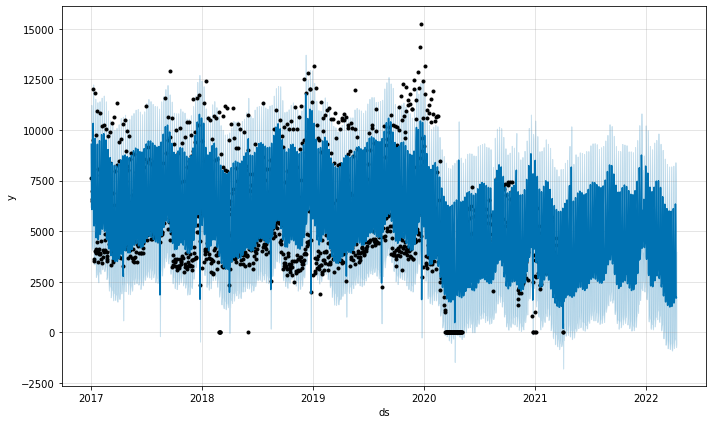

In [11]:
fig1 = m.plot(forecast)

C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is 

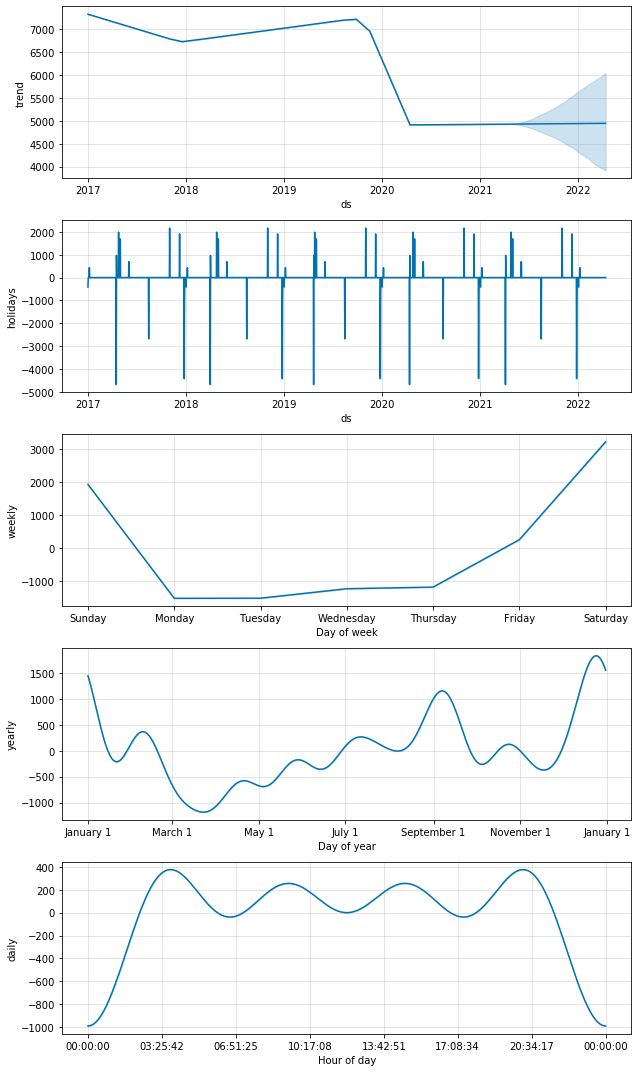

In [12]:
fig2 = m.plot_components(forecast)


In [12]:
#non mi plotta nulla
#plot_plotly(m, forecast)

In [13]:
#non mi plotta nulla
#plot_components_plotly(m, forecast)

In [13]:
#boh
forecast[(forecast['Capodanno'] +
        forecast['Assunzione della Vergine'] +
        forecast ['Epifania del Signore'] +
        forecast ['Festa della Repubblica'] +
        forecast ['Festa della Liberazione'] +
        forecast ['Immacolata Concezione'] +
        forecast ['Natale'] +
        forecast ['Santo Stefano'] +
        forecast ['Tutti i Santi'] +
        forecast['Pasqua di Resurrezione'] +
        forecast['Lunedì dell\'Angelo'] +
        forecast['Festa dei Lavoratori']).abs() > 0][
        ['ds', 'Capodanno','Assunzione della Vergine', 'Epifania del Signore','Festa dei Lavoratori',
         'Festa della Repubblica','Festa della Liberazione','Immacolata Concezione', 'Natale','Santo Stefano', 'Tutti i Santi',
         'Pasqua di Resurrezione', 'Lunedì dell\'Angelo' ]]

,ds,Capodanno,Assunzione della Vergine,Epifania del Signore,Festa dei Lavoratori,Festa della Repubblica,Festa della Liberazione,Immacolata Concezione,Natale,Santo Stefano,Tutti i Santi,Pasqua di Resurrezione,Lunedì dell'Angelo
0,2017-01-01,-415.939,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
5,2017-01-06,0.000,0.0,431.281298,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
105,2017-04-16,0.000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,-4682.310801,0.000000
106,2017-04-17,0.000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,966.348717
114,2017-04-25,0.000,0.0,0.000000,0.0,0.0,1988.208249,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,2021-12-08,0.000,0.0,0.000000,0.0,0.0,0.000000,1910.713135,0.000000,0.000000,0.0,0.000000,0.000000
1819,2021-12-25,0.000,0.0,0.000000,0.0,0.0,0.000000,0.000000,-4423.904879,0.000000,0.0,0.000000,0.000000
1820,2021-12-26,0.000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,-1121.558049,0.0,0.000000,0.000000
1826,2022-01-01,-415.939,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [15]:
m.train_holiday_names


0                    Capodanno
1         Epifania del Signore
2       Pasqua di Resurrezione
3           Lunedì dell'Angelo
4      Festa della Liberazione
5         Festa dei Lavoratori
6       Festa della Repubblica
7     Assunzione della Vergine
8                Tutti i Santi
9        Immacolata Concezione
10                      Natale
11               Santo Stefano
dtype: object

C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a 

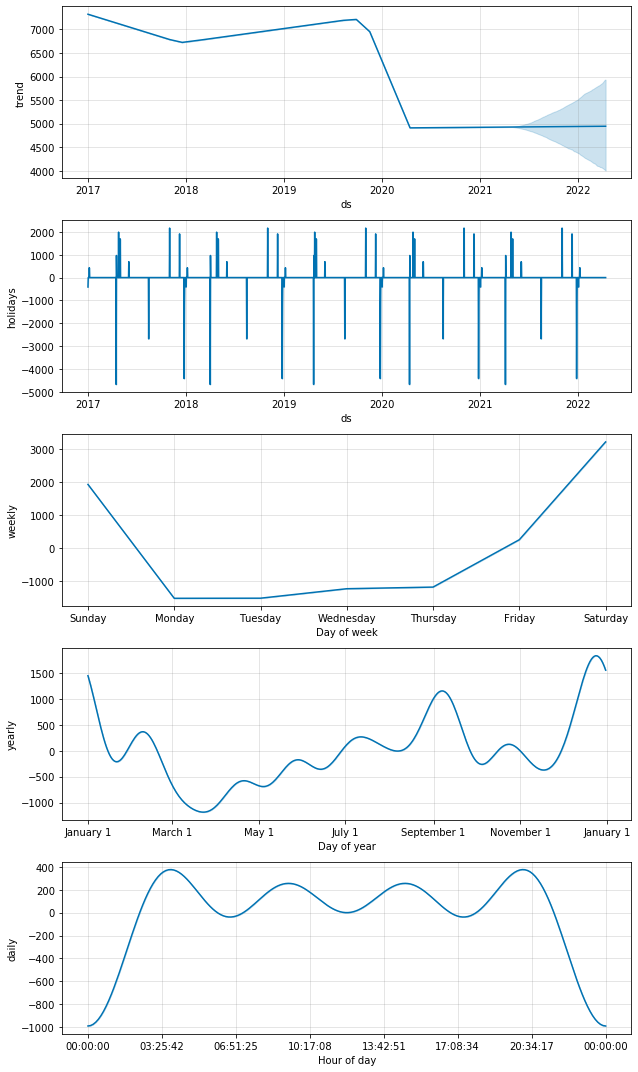

In [16]:
#uguale a sopra 
fig = m.plot_components(forecast)


C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


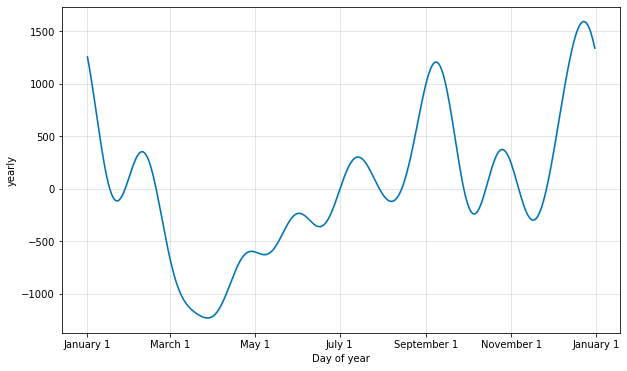

In [14]:
m = Prophet(daily_seasonality=True).fit(series1)
a = plot_yearly(m)

In [20]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='1302 days', period='90 days', horizon = '260 days')
df_cv

INFO:prophet:Making 1 forecasts with cutoffs between 2020-07-26 00:00:00 and 2020-07-26 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-07-27,1182.967590,-729.525489,3161.954256,3543.43,2020-07-26
1,2020-07-28,1105.575574,-839.257201,3074.122173,2998.24,2020-07-26
2,2020-07-29,1331.880879,-610.447905,3310.007455,3858.94,2020-07-26
3,2020-07-30,1370.229836,-440.423227,3591.709409,3255.46,2020-07-26
4,2020-07-31,2886.343835,1091.352345,4827.655421,4376.58,2020-07-26
...,...,...,...,...,...,...
255,2021-04-08,-2598.092880,-4563.849101,-566.272678,3779.84,2020-07-26
256,2021-04-09,-984.085886,-2825.177936,910.284731,4368.67,2020-07-26
257,2021-04-10,2490.186160,596.789382,4515.522362,4772.16,2020-07-26
258,2021-04-11,954.070129,-1004.899676,2880.885871,3413.91,2020-07-26


The statistics computed are mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), mean absolute percent error (MAPE), median absolute percent error (MDAPE) and coverage of the yhat_lower and yhat_upper estimates. These are computed on a rolling window of the predictions in df_cv after sorting by horizon (ds minus cutoff). By default 10% of the predictions will be included in each window, but this can be changed with the rolling_window argument.

In [21]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,26 days,6.906859e+06,2628.090303,2409.681423,0.664170,0.861257,0.423077
1,27 days,6.699244e+06,2588.289820,2334.929091,0.658523,0.825537,0.461538
2,28 days,6.583670e+06,2565.866397,2291.356450,0.658523,0.795864,0.461538
3,29 days,6.767885e+06,2601.515895,2322.738550,0.681427,0.808427,0.461538
4,30 days,6.928546e+06,2632.213198,2357.172752,0.704585,0.821643,0.423077


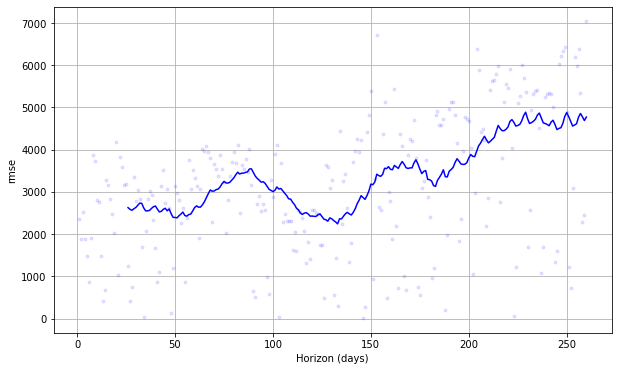

In [23]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')